In [1]:
# import all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [2]:
# Load Dataset
data = pd.read_csv('A_Z Handwritten Data.csv', header=None)
cols = ['label'] + [f'pixel{i}' for i in range(784)]
data.columns = cols
print("Dataset loaded:", data.shape)

Dataset loaded: (372451, 785)


In [3]:
# Split features and labels
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
print("Feature shape:", X.shape, " | ", "Labels shape:", y.shape)

Feature shape: (372451, 784)  |  Labels shape: (372451,)


In [4]:
# Normalize pixel values
X = X.astype('float32') / 255.0

In [5]:
# Train and Test split (80/20, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train:", X_train.shape, " | ", "Test:", X_test.shape)

Train: (297960, 784)  |  Test: (74491, 784)


In [6]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=26)
y_test_cat  = to_categorical(y_test, num_classes=26)
print("Encoded labels:", y_train_cat.shape)

Encoded labels: (297960, 26)


In [8]:
# Save flattened CSVs for CNN notebook
train_data = pd.DataFrame(X_train)
train_data.insert(0, 'label', y_train)

test_data = pd.DataFrame(X_test)
test_data.insert(0, 'label', y_test)

train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


In [9]:
# ANN expects flattened input vectors of length 784
model_ann = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')
])

model_ann.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_ann.summary()

C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           6,682 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 539,930 (2.06 MB)

 Trainable params: 539,930 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# TRAINING
es = EarlyStopping(patience=5, restore_best_weights=True)
mc = ModelCheckpoint('best_ann_model.keras', save_best_only=True)

history = model_ann.fit(
    X_train, y_train_cat,
    validation_split=0.1,
    epochs=25,
    batch_size=256,
    callbacks=[es, mc],
    verbose=2
)


Epoch 1/25
1048/1048 - 9s - 9ms/step - accuracy: 0.8857 - loss: 0.4012 - val_accuracy: 0.9611 - val_loss: 0.1354
Epoch 2/25
1048/1048 - 8s - 8ms/step - accuracy: 0.9478 - loss: 0.1789 - val_accuracy: 0.9720 - val_loss: 0.0970
Epoch 3/25
1048/1048 - 9s - 8ms/step - accuracy: 0.9581 - loss: 0.1431 - val_accuracy: 0.9758 - val_loss: 0.0808
Epoch 4/25
1048/1048 - 9s - 8ms/step - accuracy: 0.9638 - loss: 0.1243 - val_accuracy: 0.9781 - val_loss: 0.0743
Epoch 5/25
1048/1048 - 9s - 8ms/step - accuracy: 0.9668 - loss: 0.1118 - val_accuracy: 0.9801 - val_loss: 0.0668
Epoch 6/25
1048/1048 - 9s - 8ms/step - accuracy: 0.9690 - loss: 0.1037 - val_accuracy: 0.9804 - val_loss: 0.0649
Epoch 7/25
1048/1048 - 9s - 8ms/step - accuracy: 0.9704 - loss: 0.0978 - val_accuracy: 0.9820 - val_loss: 0.0602
Epoch 8/25
1048/1048 - 9s - 8ms/step - accuracy: 0.9720 - loss: 0.0917 - val_accuracy: 0.9845 - val_loss: 0.0529
Epoch 9/25
1048/1048 - 9s - 8ms/step - accuracy: 0.9736 - loss: 0.0867 - val_accuracy: 0.9861 - 

In [11]:
# EVALUATION
test_loss, test_acc = model_ann.evaluate(X_test, y_test_cat, verbose=2)
print(f"\n Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")


2328/2328 - 2s - 1ms/step - accuracy: 0.9895 - loss: 0.0379

 Test Accuracy: 0.9895 | Test Loss: 0.0379


In [12]:
# Predictions
y_pred = np.argmax(model_ann.predict(X_test), axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("\n Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step

 Classification Report:
              precision    recall  f1-score   support

           0     0.9771    0.9978    0.9873      2774
           1     0.9924    0.9810    0.9867      1734
           2     0.9887    0.9947    0.9917      4682
           3     0.9674    0.9665    0.9669      2027
           4     0.9878    0.9882    0.9880      2288
           5     0.9823    0.9528    0.9673       233
           6     0.9843    0.9826    0.9835      1152
           7     0.9818    0.9723    0.9770      1444
           8     0.9696    0.9955    0.9824       224
           9     0.9787    0.9735    0.9761      1699
          10     0.9820    0.9723    0.9771      1121
          11     0.9901    0.9948    0.9925      2317
          12     0.9902    0.9862    0.9882      2467
          13     0.9864    0.9897    0.9881      3802
          14     0.9932    0.9933    0.9932     11565
          15     0.9940    0.9917    0.9929      3868
          1

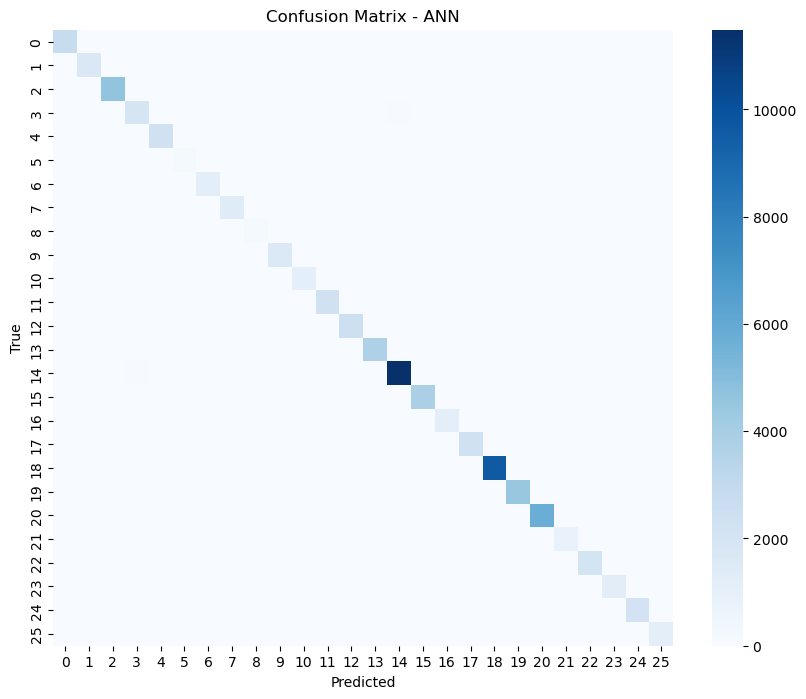

In [13]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap='Blues', annot=False)
plt.title("Confusion Matrix - ANN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


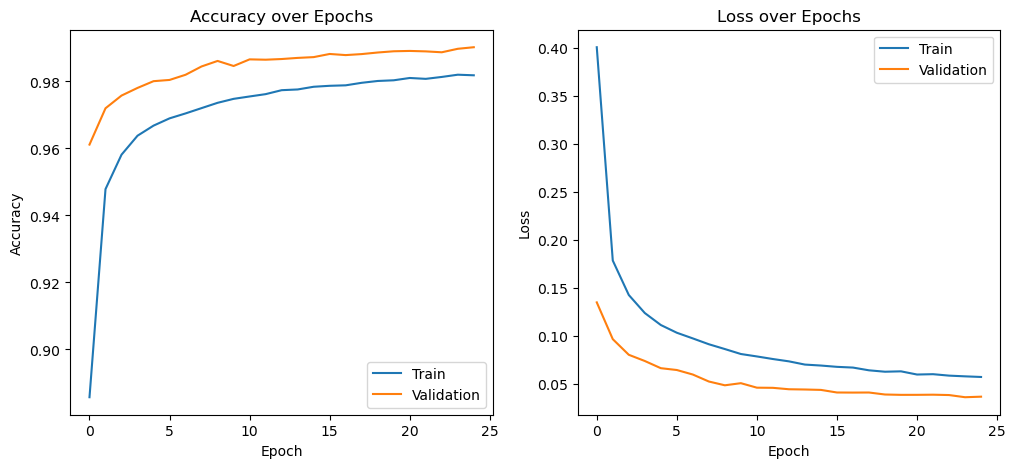

ANN model training and evaluation complete.


In [14]:
# TRAINING CURVES
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("ANN model training and evaluation complete.")